In [1]:
import enzope as ezp
from enzope.graphs.graph_class import GTG
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
!pip show enzope

Name: enzope
Version: 0.0.12
Summary: Agent based modelling in complex networks
Home-page: https://github.com/lautarogiordano/enzope
Author: Lautaro Giordano
Author-email: giordanolautaro@gmail.com
License: 
Location: /home/lautaro/Workspace/ib/code/codedoc/enzope
Requires: networkx, numba, numpy
Required-by: 


In [3]:
gtg = GTG(n_nodes=100, theta=100, plotable=True)

Average length: 5.254775198354393 Connectivity: 5.6


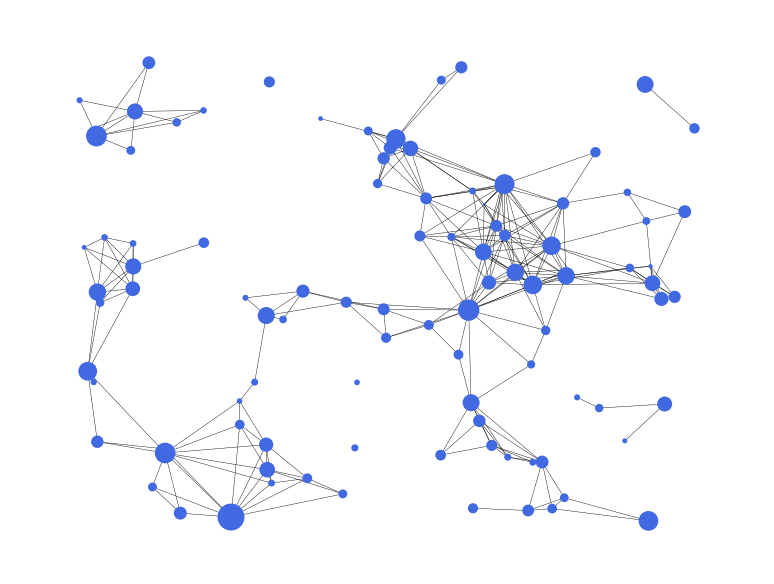

In [4]:
print("Average length:", gtg.get_average_distance(), "Connectivity:", gtg.get_mean_connectivity())
gtg.plot_snapshot(w_min=1e-17)

### Conectividad en función del umbral

In [91]:
thetas = np.linspace(10, 300, 100, dtype=np.int32)
n_set = np.linspace(10, 200, 100, dtype=np.int32)
reps = 10
connectivity_ensemble = np.zeros((reps, len(thetas)), dtype=np.float32)
for i in range(reps):
    connectivity_ensemble[i, :] = [GTG(n_nodes=200, theta=theta).get_mean_connectivity() for theta in thetas]
connectivity_ensemble.shape

(10, 100)

<ErrorbarContainer object of 3 artists>

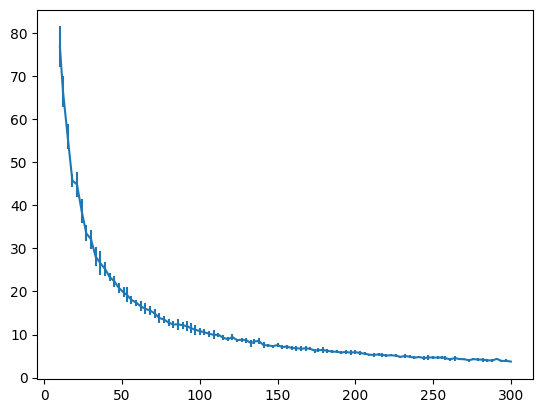

In [93]:
plt.errorbar(thetas, np.mean(connectivity_ensemble, axis=0), np.std(connectivity_ensemble, axis=0))

### Small-world?

In [99]:
n_set = np.linspace(10, 300, 100, dtype=np.int32)
reps = 10
distances = np.zeros(shape=(reps, 100), dtype=float)
for i in range(reps):
    distances[i] = [GTG(n_nodes=n, theta=100).get_average_distance() for n in n_set]

<ErrorbarContainer object of 3 artists>

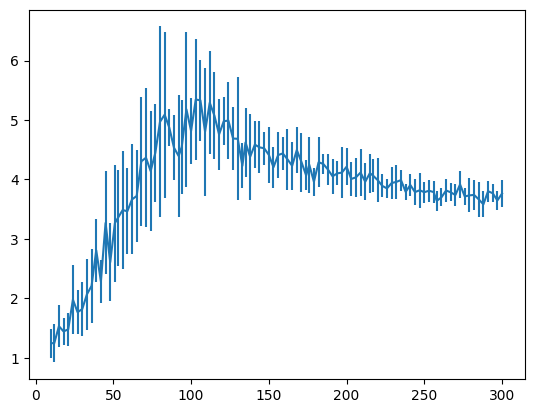

In [100]:
plt.errorbar(n_set, np.mean(distances, axis=0), np.std(distances, axis=0))
# plt.plot(n_set, n_set)

In [75]:
nx.smallworld.omega(nx.barabasi_albert_graph(10, 4))

0.13876022560818335